In [38]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

def consulta_desde_archivo(sql):
    # Lee el contenido del archivo SQL
    with open(sql, "r") as file:
        sql = file.read()

    # Ejecuta la consulta y convierte los resultados a un DataFrame de pandas
    cliente = bigquery.Client()
    df_resultado = cliente.query(sql).to_dataframe()
    print(df_resultado.head(2))
    print(df_resultado.shape)
    return df_resultado

# Llama a la función con el nombre de tu archivo SQL
df=consulta_desde_archivo("corona_tada.sql")

                                               td_id  ordenes    money
0  00005beff72033e6d62d53c0be42b71a6474acfa502e40...        2  54600.0
1  0001dd3376517611a308369481b301d55a727b54e41cd5...        2  87400.0
(37521, 3)


[1.0 2.0]


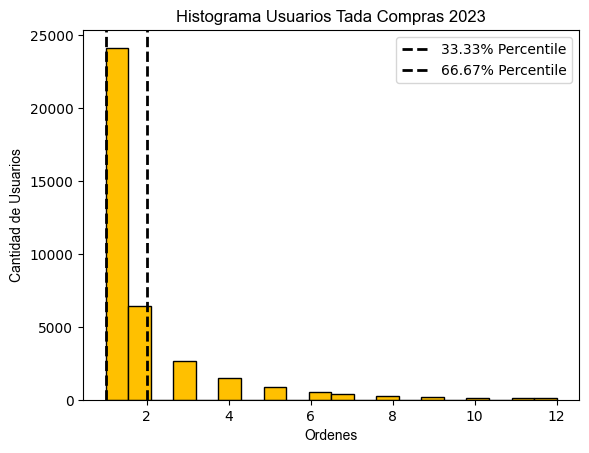

In [44]:
# Calcula el histograma
# Calcula el percentil 99
percentil_90 = np.percentile(df.ordenes, 99)

# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = df[df.ordenes <= percentil_90]

hist, bins = np.histogram(df_subset.ordenes, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df_subset.ordenes, [33.33, 66.67])
print(percentiles)

# Crea el histograma
plt.hist(df_subset.ordenes, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Ordenes', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios Tada Compras 2023', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

In [45]:
# Crear un nuevo DataFrame con valores menores o iguales a 1
menores1 = df[df['ordenes'] <= 1].copy()
# Excluir los valores menores o iguales a 1 del DataFrame original
df = df[df['ordenes'] > 1].copy()

[28700.       44707.041968]


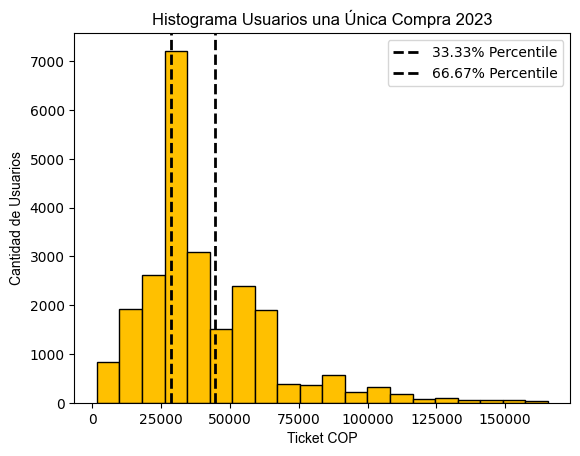

In [48]:
# Calcula el histograma
# Calcula el percentil 99
percentil_90 = np.percentile(menores1.money, 99)

# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = menores1[menores1.money <= percentil_90]

hist, bins = np.histogram(df_subset.money, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df_subset.money, [33.33, 66.67])
print(percentiles)

# Crea el histograma
plt.hist(df_subset.money, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Ticket COP', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios una Única Compra 2023', fontname='Arial')
plt.legend()

# Muestra el histograma
plt.show()

[ 93400. 173700.]


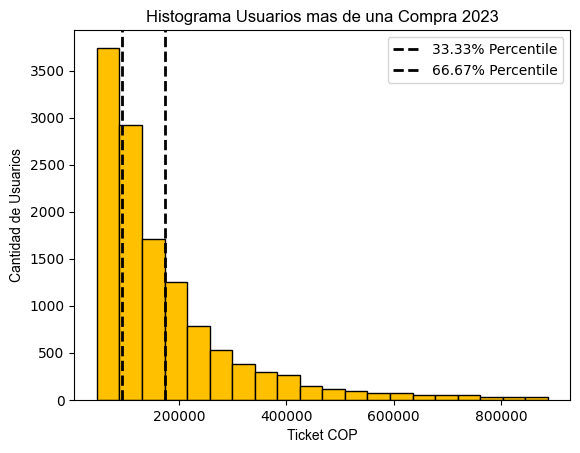

In [50]:

# Calcula el percentil 99
percentil_90 = np.percentile(df.money, 99)
percentil_5 = np.percentile(df.money, 5)
# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = df[df.money <= percentil_90]
df_subset = df_subset[df_subset.money >= percentil_5]
# # Redondea la columna 'tu_columna' a 2 decimales
# df_subset.loc['money'] = df_subset['money'].round(2)
# Calcula el histograma
hist, bins = np.histogram(df_subset.money, bins=20)  # Puedes ajustar el número de bins según tu preferencia
# Calcula percentiles
percentiles = np.percentile(df_subset.money, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df_subset.money, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')

# Añade etiquetas y título
plt.xlabel('Ticket COP', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios mas de una Compra 2023', fontname='Arial')
plt.legend()


# Muestra el histograma
plt.show()

[2.0 3.0]


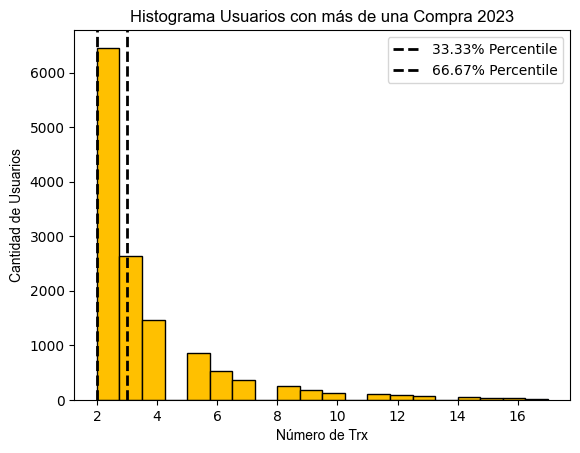

In [54]:
# Calcula el percentil 99
percentil_90 = np.percentile(df.ordenes, 99)
# Crea el subset excluyendo los valores superiores al percentil 99
df_subset = df[df.ordenes <= percentil_90]

# Calcula el histograma
hist, bins = np.histogram(df_subset.ordenes, bins=20)  # Puedes ajustar el número de bins según tu preferencia

# Calcula percentiles
percentiles = np.percentile(df_subset.ordenes, [33.33, 66.67])
print(percentiles)
# Crea el histograma
plt.hist(df_subset.ordenes, bins=20, edgecolor='black', color=(255/255, 192/255, 0))
plt.axvline(percentiles[0], color='black', linestyle='dashed', linewidth=2, label='33.33% Percentile')
plt.axvline(percentiles[1], color='black', linestyle='dashed', linewidth=2, label='66.67% Percentile')


# Añade etiquetas y título
plt.xlabel('Número de Trx', fontname='Arial')
plt.ylabel('Cantidad de Usuarios', fontname='Arial')
plt.title('Histograma Usuarios con más de una Compra 2023', fontname='Arial')
plt.legend()
# Muestra el histograma
plt.show()